# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys_weather import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [4]:
cities

['mataura',
 'waipawa',
 'rio gallegos',
 'fortuna',
 'chagda',
 'tiksi',
 'jamestown',
 'mahebourg',
 'busselton',
 'khatanga',
 'tabas',
 'rikitea',
 'coquimbo',
 'caravelas',
 'illoqqortoormiut',
 'palmer',
 'tuktoyaktuk',
 'teya',
 'bathsheba',
 'nikolskoye',
 'finnsnes',
 'yellowknife',
 'russell',
 'ushuaia',
 'kapaa',
 'makakilo city',
 'taolanaro',
 'belushya guba',
 'cabo san lucas',
 'faanui',
 'butaritari',
 'mutsamudu',
 'najran',
 'luderitz',
 'hobart',
 'bredasdorp',
 'sitka',
 'bossangoa',
 'albany',
 'fairbanks',
 'roald',
 'richards bay',
 'vaitupu',
 'beringovskiy',
 'punta arenas',
 'altay',
 'new norfolk',
 'castro',
 'qaanaaq',
 'saleaula',
 'longyearbyen',
 'tasiilaq',
 'ngunguru',
 'verkhnevilyuysk',
 'xapuri',
 'ribeira grande',
 'edson',
 'carnarvon',
 'bethel',
 'la ronge',
 'paamiut',
 'margate',
 'calbuco',
 'bluff',
 'okhotsk',
 'hithadhoo',
 'pappadatai',
 'grand river south east',
 'imeni poliny osipenko',
 'cape town',
 'anadyr',
 'arraial do cabo',
 'tu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
temp = []
count = []
city_1 = "walker"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
response_test = requests.get(query_url + city_1).json()
print(json.dumps(response_test))

{"coord": {"lon": -95.57, "lat": 30.73}, "weather": [{"id": 800, "main": "Clear", "description": "clear sky", "icon": "01n"}], "base": "stations", "main": {"temp": 44.6, "feels_like": 41.29, "temp_min": 39, "temp_max": 51.01, "pressure": 1021, "humidity": 93}, "visibility": 11265, "wind": {"speed": 2.91, "deg": 100}, "clouds": {"all": 1}, "dt": 1579921612, "sys": {"type": 1, "id": 3067, "country": "US", "sunrise": 1579871875, "sunset": 1579909819}, "timezone": -21600, "id": 4739690, "name": "Walker", "cod": 200}


In [ ]:
{"coord": { "lon": 139,"lat": 35},
  "weather": [
    {
      "id": 800,
      "main": "Clear",
      "description": "clear sky",
      "icon": "01n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 281.52,
    "feels_like": 278.99,
    "temp_min": 280.15,
    "temp_max": 283.71,
    "pressure": 1016,
    "humidity": 93
  },
  "wind": {
    "speed": 0.47,
    "deg": 107.538
  },
  "clouds": {
    "all": 2
  },
  "dt": 1560350192,
  "sys": {
    "type": 3,
    "id": 2019346,
    "message": 0.0065,
    "country": "JP",
    "sunrise": 1560281377,
    "sunset": 1560333478
  },
  "timezone": 32400,
  "id": 1851632,
  "name": "Shuzenji",
  "cod": 200
}

In [ ]:
City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564

In [9]:
info = []

for city in cities:
    response = requests.get(query_url + city).json()
    print("Processing city %s"% city)
    try:
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        clouds = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        max_temp = response["main"]["temp_max"]
        wind_sp = response["wind"]["speed"]
        info.append({"lat":lat,"lon":lon,"city":city,"clouds":clouds,"country":country,"date":date,"humidity":humidity,"max_temp":max_temp,"wind_sp":wind_sp})
    except:
        print("City not found")
        pass
print("Done")

Processing city mataura
Processing city waipawa
Processing city rio gallegos
Processing city fortuna
Processing city chagda
City not found
Processing city tiksi
Processing city jamestown
Processing city mahebourg
Processing city busselton
Processing city khatanga
Processing city tabas
Processing city rikitea
Processing city coquimbo
Processing city caravelas
Processing city illoqqortoormiut
City not found
Processing city palmer
Processing city tuktoyaktuk
Processing city teya
Processing city bathsheba
Processing city nikolskoye
Processing city finnsnes
Processing city yellowknife
Processing city russell
Processing city ushuaia
Processing city kapaa
Processing city makakilo city
Processing city taolanaro
City not found
Processing city belushya guba
City not found
Processing city cabo san lucas
Processing city faanui
Processing city butaritari
Processing city mutsamudu
City not found
Processing city najran
Processing city luderitz
Processing city hobart
Processing city bredasdorp
Process

Processing city ambodifototra
City not found
Processing city shahreza
Processing city sisimiut
Processing city kerekegyhaza
Processing city donji vakuf
Processing city aklavik
Processing city takoradi
Processing city salalah
Processing city milkovo
Processing city ashford
Processing city taungdwingyi
Processing city tynda
Processing city orlik
Processing city scarborough
Processing city samalaeulu
City not found
Processing city lewiston
Processing city vila franca do campo
Processing city broken hill
Processing city amga
Processing city riyadh
Processing city amderma
City not found
Processing city port macquarie
Processing city hovd
Processing city goderich
Processing city tabiauea
City not found
Processing city jalu
Processing city fairfield
Processing city burnie
Processing city yashan
Processing city barentsburg
City not found
Processing city dibulla
Processing city vilhena
Processing city cherskiy
Processing city teguldet
Processing city hasaki
Processing city sheboygan
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame(info)
weather_df.to_csv("weatherdata.csv")
weather_df.head()

,lat,lon,city,clouds,country,date,humidity,max_temp,wind_sp
0,-46.19,168.86,mataura,72,NZ,1579921241,60,66.99,8.01
1,-41.41,175.52,waipawa,83,NZ,1579921369,60,75.20,19.46
2,-51.62,-69.22,rio gallegos,30,AR,1579921082,87,46.40,5.82
3,40.60,-124.16,fortuna,90,US,1579920999,87,57.00,4.85
4,71.69,128.87,tiksi,0,RU,1579921258,78,-31.70,5.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

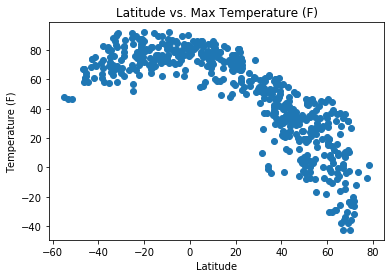

In [24]:
Latitude = weather_df["lat"]
Temperature = weather_df["max_temp"]

plt.scatter(Latitude, Temperature)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs. Max Temperature (F)")

plt.show
plt.savefig("lat_temp.png")

In [ ]:
# There is a strong correlation between Latitude and Max Temperature. 
# As you get farther away from the equator, max temperature decreases

#### Latitude vs. Humidity Plot

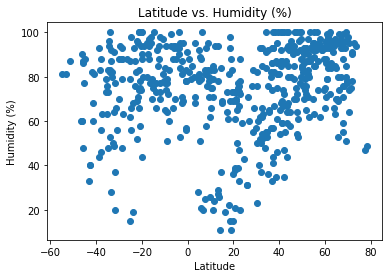

In [23]:
Humidity = weather_df["humidity"]

plt.scatter(Latitude, Humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity (%)")

plt.show
plt.savefig("lat_humid.png")

In [ ]:
# There does not appear to be a strong correlation between latitude and humidity percentage.

#### Latitude vs. Cloudiness Plot

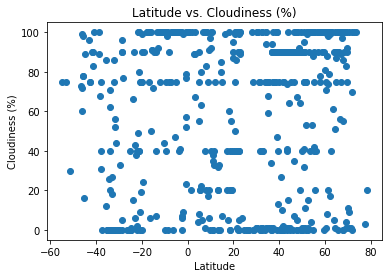

In [25]:
cloudiness = weather_df["clouds"]

plt.scatter(Latitude, cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (%)")

plt.show
plt.savefig("lat_cloud.png")

In [ ]:
# There does not appear to be a strong correlation between latitude and cloudiness percentage.

#### Latitude vs. Wind Speed Plot

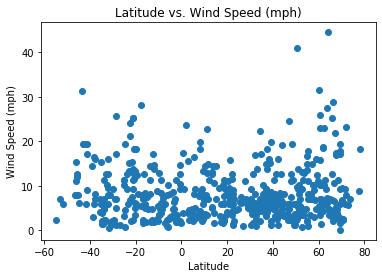

In [26]:
wind = weather_df["wind_sp"]

plt.scatter(Latitude, wind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph)")

plt.show
plt.savefig("lat_wind_sp.png")

In [ ]:
# There does not appear to be a strong correlation between latitude and wind speed.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [27]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[(weather_df["lat"] > 0)]
southern_df = weather_df.loc[(weather_df["lat"] < 0)]
northern_df

,lat,lon,city,clouds,country,date,humidity,max_temp,wind_sp
3,40.60,-124.16,fortuna,90,US,1579920999,87,57.00,4.85
4,71.69,128.87,tiksi,0,RU,1579921258,78,-31.70,5.95
5,42.10,-79.24,jamestown,90,US,1579921247,86,44.01,16.11
8,71.97,102.50,khatanga,70,RU,1579921118,90,-22.83,7.87
9,33.60,56.92,tabas,0,IR,1579921636,48,37.40,4.70
...,...,...,...,...,...,...,...,...,...
535,65.75,150.85,zyryanka,100,RU,1579921682,95,-25.37,6.91
536,60.75,-137.51,haines junction,99,CA,1579921278,96,-9.22,3.44
538,53.26,-4.31,llangefni,100,GB,1579921682,87,46.40,11.41
541,43.12,5.80,sanary-sur-mer,90,FR,1579921682,87,55.00,3.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8499436554601723


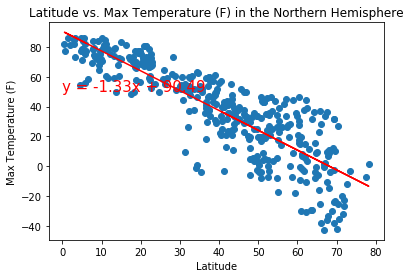

In [29]:
temp_north = northern_df["max_temp"]
lat_north = northern_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, temp_north)
regress_val = lat_north*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, temp_north)
plt.plot(lat_north, regress_val,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature (F) in the Northern Hemisphere")
print(f"The r-squared is: {rvalue}")


plt.show
plt.savefig("lat_temp_north_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47068918195629333


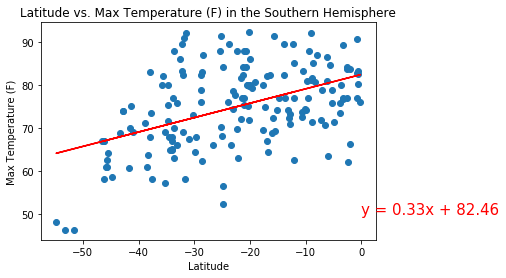

In [39]:
temp_south = southern_df["max_temp"]
lat_south = southern_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, temp_south)
regress_val_2 = lat_south*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, temp_south)
plt.plot(lat_south, regress_val_2,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature (F) in the Southern Hemisphere")
print(f"The r-squared is: {rvalue}")


plt.show
plt.savefig("lat_temp_south_regression.png")

In [ ]:
# In the northern hemisphere, as latitude increases, the max temperature decreases.
# In the southern hemisphere, as latitude decreases, the max temperature decreases.
# The correlation is stronger in the northern hemisphere because there are more data points in the northern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38919002070871617


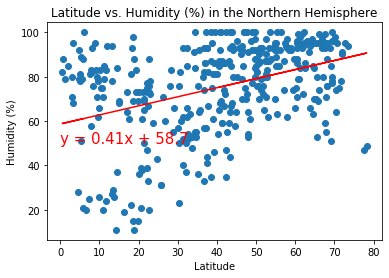

In [31]:
humid_north = northern_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, humid_north)
regress_val = lat_north*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, humid_north)
plt.plot(lat_north, regress_val,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity (%) in the Northern Hemisphere")
print(f"The r-squared is: {rvalue}")


plt.show
plt.savefig("lat_humid_north_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2437849000619988


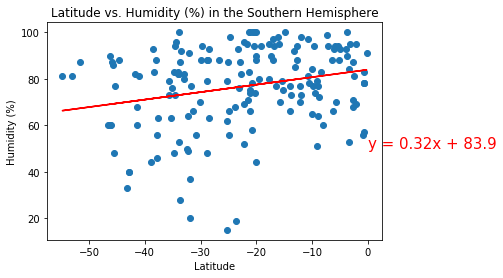

In [32]:
humid_south = southern_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, humid_south)
regress_val = lat_south*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, humid_south)
plt.plot(lat_south, regress_val,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity (%) in the Southern Hemisphere")
print(f"The r-squared is: {rvalue}")


plt.show
plt.savefig("lat_humid_south_regression.png")

In [ ]:
# There does not appear to be a very strong correlation between latitude and humidity percentage 
# in either the northern or southern hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16983113945644684


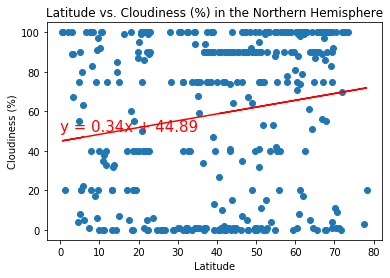

In [33]:
clouds_north = northern_df["clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, clouds_north)
regress_val = lat_north*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, clouds_north)
plt.plot(lat_north, regress_val,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (%) in the Northern Hemisphere")
print(f"The r-squared is: {rvalue}")


plt.show
plt.savefig("lat_clouds_north_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21069780504898666


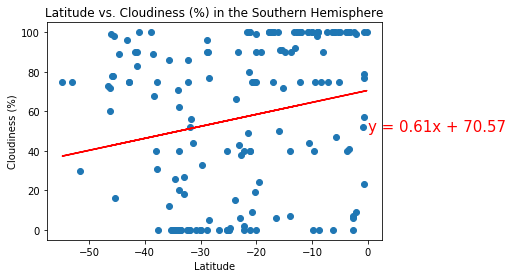

In [34]:
clouds_south = southern_df["clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, clouds_south)
regress_val = lat_south*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, clouds_south)
plt.plot(lat_south, regress_val,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (%) in the Southern Hemisphere")
print(f"The r-squared is: {rvalue}")


plt.show
plt.savefig("lat_clouds_south_regression.png")

In [ ]:
# There does not appear to be a very strong correlation between latitude and cloudiness percentage 
# in either the northern or southern hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10185260989285942


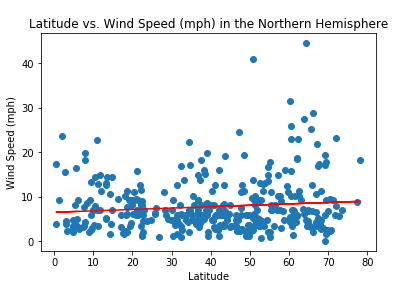

In [35]:
wind_north = northern_df["wind_sp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, wind_north)
regress_val = lat_north*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, wind_north)
plt.plot(lat_north, regress_val,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph) in the Northern Hemisphere")
print(f"The r-squared is: {rvalue}")


plt.show
plt.savefig("lat_wind_north_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.20007289970879635


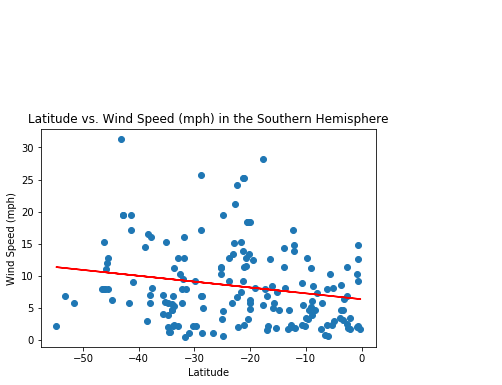

In [36]:
wind_south = southern_df["wind_sp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, wind_south)
regress_val = lat_south*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, wind_south)
plt.plot(lat_south, regress_val,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph) in the Southern Hemisphere")
print(f"The r-squared is: {rvalue}")


plt.show
plt.savefig("lat_wind_south_regression.png")

In [ ]:
# There does not appear to be a very strong correlation between latitude and wind speed 
# in either the northern or southern hemispheres.